In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
file_name = 'Covid-19.csv'
folder_path = r'..\Datos-COVID19\output\producto1'
file_path = os.path.join(folder_path, file_name)

In [26]:
df = pd.read_csv(file_path)
df

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,Tasa
0,Arica y Parinacota,15,Arica,15101,247552.0,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,67.1
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tarapacá,1,Alto Hospicio,1107,129999.0,0.0,0.0,0.0,5.0,6.0,10.0,14.0,15.0,16.0,27.0,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Magallanes,12,Punta Arenas,12101,141984.0,29.0,87.0,143.0,203.0,207.0,299.0,387.0,416.0,470.0,516.0,363.4
342,Magallanes,12,Rio Verde,12103,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,Magallanes,12,Timaukel,12303,282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
lst_cmn = ['Cerro Navia', 'Nunoa', 'Las Condes', 'Providencia']
dict_area = {'Pedro Aguirre Cerda':12.0,
             'Cerrillos':21.0,
             'Quinta Normal':10.0,
             'Nunoa':16.9,
             'Las Condes':99.0,
             'Providencia':14.34,
             'Quilicura':58.0,
             'Iquique':20.9,
             'Antofagasta':15.0,
             'Alto Hospicio':20.0,
             'Arica':11.0,
             'El Bosque':14.1,
             'San Bernardo':39.5,
             'Cerro Navia':11.1}
lst_df = []
ncmn = len(lst_cmn)

for ind in range(ncmn):
    lst_df.append(df[df.Comuna == lst_cmn[ind]]) 

for ind in range(ncmn):
    display(lst_df[ind])

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,Tasa
86,Metropolitana,13,Cerro Navia,13103,142465.0,19.0,21.0,26.0,31.0,36.0,42.0,57.0,65.0,79.0,99.0,69.5


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,Tasa
110,Metropolitana,13,Nunoa,13120,250192.0,67.0,84.0,93.0,107.0,118.0,155.0,171.0,188.0,217.0,240.0,95.9


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,Tasa
102,Metropolitana,13,Las Condes,13114,330759.0,181.0,208.0,224.0,258.0,266.0,281.0,296.0,306.0,320.0,326.0,98.6


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,Tasa
117,Metropolitana,13,Providencia,13123,157749.0,82.0,87.0,94.0,104.0,115.0,129.0,136.0,147.0,164.0,180.0,114.1


In [28]:
def bld_df(df, area):
    index = []
    cases = []
    df_out = pd.DataFrame()
    index = list(df.columns[5:-1].values)
    idx = df.index[0]
    for date in index:
        num = df.loc[idx][date]
        cases.append(float(num)) 
    index.insert(0,'2020-3-28')
    cases.insert(0,float(0))
    index = [pd.to_datetime(ind) for ind in index]
    df_out = pd.DataFrame(cases, index=index, columns=['cum_cases'])
    df_out['date']                = df_out.index.values    
    df_out['cum_cases_per_100th'] = 1e5 * df_out['cum_cases'] / float(df.Poblacion)
    df_out['new_cases']           = df_out['cum_cases'].diff(periods=1)
    df_out['new_cases3']          = df_out['cum_cases'].diff(periods=3)
    df_out['new_cases5']          = df_out['cum_cases'].diff(periods=5)
    df_out['new_cases7']          = df_out['cum_cases'].diff(periods=7)
    df_out['shift_cum_cases']     = df_out['cum_cases'].shift(1, axis=0)
    df_out['increment']           = 100.0 * df_out['new_cases'] / df_out['cum_cases']
    df_out['increment3']          = 100.0 * df_out['new_cases3'] / df_out['cum_cases']
    df_out['increment5']          = 100.0 * df_out['new_cases5'] / df_out['cum_cases']
    df_out['increment7']          = 100.0 * df_out['new_cases7'] / df_out['cum_cases']
    df_out['new_cases_per_100th'] = 1e5 * df_out['new_cases'] / float(df.Poblacion)
    df_out['new_cases3_per_100th']= 1e5 * df_out['new_cases3'] / float(df.Poblacion)
    df_out['new_cases5_per_100th']= 1e5 * df_out['new_cases5'] / float(df.Poblacion)
    df_out['new_cases7_per_100th']= 1e5 * df_out['new_cases7'] / float(df.Poblacion)
    df_out['new_cas_per_100th_area'] = 1e5 * df_out['new_cases'] / float(df.Poblacion) / area
    df_out['new_cas3_per_100th_area']= 1e5 * df_out['new_cases3'] / float(df.Poblacion) / area
    df_out['new_cas5_per_100th_area']= 1e5 * df_out['new_cases5'] / float(df.Poblacion) / area
    df_out['new_cas7_per_100th_area']= 1e5 * df_out['new_cases7'] / float(df.Poblacion) / area
    
    
    return df_out

def itp_df(df):
    df_itp = df.resample('D').mean()
    df_itp = df_itp.interpolate()
    
    return df_itp

In [29]:
lst_ts = []
lst_ts_tmp = []

for ind in range(ncmn):
    area = dict_area[lst_cmn[ind]]
    lst_ts_tmp.append(bld_df(lst_df[ind], area))

for ind in range(ncmn):
    lst_ts.append(itp_df(lst_ts_tmp[ind]))

for ind in range(ncmn):
    display(lst_ts[ind])

,cum_cases,cum_cases_per_100th,new_cases,new_cases3,new_cases5,new_cases7,shift_cum_cases,increment,increment3,increment5,increment7,new_cases_per_100th,new_cases3_per_100th,new_cases5_per_100th,new_cases7_per_100th,new_cas_per_100th_area,new_cas3_per_100th_area,new_cas5_per_100th_area,new_cas7_per_100th_area
2020-03-28,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,9.500000,6.668304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,19.000000,13.336609,19.0,NaN,NaN,NaN,0.000000,100.000000,NaN,NaN,NaN,13.336609,NaN,NaN,NaN,1.201496,NaN,NaN,NaN
2020-03-31,20.000000,14.038536,10.5,NaN,NaN,NaN,9.500000,54.761905,NaN,NaN,NaN,7.370231,NaN,NaN,NaN,0.663985,NaN,NaN,NaN
2020-04-01,21.000000,14.740463,2.0,NaN,NaN,NaN,19.000000,9.523810,NaN,NaN,NaN,1.403854,NaN,NaN,NaN,0.126473,NaN,NaN,NaN
2020-04-02,23.500000,16.495280,3.5,NaN,NaN,NaN,20.000000,14.377289,NaN,NaN,NaN,2.456744,NaN,NaN,NaN,0.221328,NaN,NaN,NaN
2020-04-03,26.000000,18.250097,5.0,26.000000,NaN,NaN,21.000000,19.230769,100.000000,NaN,NaN,3.509634,18.250097,NaN,NaN,0.316183,1.644153,NaN,NaN
2020-04-04,27.666667,19.419974,5.0,21.333333,NaN,NaN,22.666667,18.196857,79.569892,NaN,NaN,3.509634,14.974438,NaN,NaN,0.316183,1.349048,NaN,NaN
2020-04-05,29.333333,20.589852,5.0,16.666667,NaN,NaN,24.333333,17.162945,59.139785,NaN,NaN,3.509634,11.698780,NaN,NaN,0.316183,1.053944,NaN,NaN
2020-04-06,31.000000,21.759730,5.0,12.000000,NaN,NaN,26.000000,16.129032,38.709677,NaN,NaN,3.509634,8.423121,NaN,NaN,0.316183,0.758840,NaN,NaN


,cum_cases,cum_cases_per_100th,new_cases,new_cases3,new_cases5,new_cases7,shift_cum_cases,increment,increment3,increment5,increment7,new_cases_per_100th,new_cases3_per_100th,new_cases5_per_100th,new_cases7_per_100th,new_cas_per_100th_area,new_cas3_per_100th_area,new_cas5_per_100th_area,new_cas7_per_100th_area
2020-03-28,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,33.500000,13.389717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,67.000000,26.779433,67.000000,NaN,NaN,NaN,0.000000,100.000000,NaN,NaN,NaN,26.779433,NaN,NaN,NaN,1.584582,NaN,NaN,NaN
2020-03-31,75.500000,30.176824,42.000000,NaN,NaN,NaN,33.500000,60.119048,NaN,NaN,NaN,16.787108,NaN,NaN,NaN,0.993320,NaN,NaN,NaN
2020-04-01,84.000000,33.574215,17.000000,NaN,NaN,NaN,67.000000,20.238095,NaN,NaN,NaN,6.794782,NaN,NaN,NaN,0.402058,NaN,NaN,NaN
2020-04-02,88.500000,35.372834,13.000000,NaN,NaN,NaN,75.500000,14.957757,NaN,NaN,NaN,5.196009,NaN,NaN,NaN,0.307456,NaN,NaN,NaN
2020-04-03,93.000000,37.171452,9.000000,93.000000,NaN,NaN,84.000000,9.677419,100.000000,NaN,NaN,3.597237,37.171452,NaN,NaN,0.212854,2.199494,NaN,NaN
2020-04-04,97.666667,39.036686,10.666667,75.333333,NaN,NaN,87.000000,10.812984,79.127726,NaN,NaN,4.263392,30.110209,NaN,NaN,0.252272,1.781669,NaN,NaN
2020-04-05,102.333333,40.901921,12.333333,57.666667,NaN,NaN,90.000000,11.948548,58.255452,NaN,NaN,4.929547,23.048965,NaN,NaN,0.291689,1.363844,NaN,NaN
2020-04-06,107.000000,42.767155,14.000000,40.000000,NaN,NaN,93.000000,13.084112,37.383178,NaN,NaN,5.595703,15.987721,NaN,NaN,0.331107,0.946019,NaN,NaN


,cum_cases,cum_cases_per_100th,new_cases,new_cases3,new_cases5,new_cases7,shift_cum_cases,increment,increment3,increment5,increment7,new_cases_per_100th,new_cases3_per_100th,new_cases5_per_100th,new_cases7_per_100th,new_cas_per_100th_area,new_cas3_per_100th_area,new_cas5_per_100th_area,new_cas7_per_100th_area
2020-03-28,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,90.500000,27.361311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,181.000000,54.722623,181.000000,NaN,NaN,NaN,0.000000,100.000000,NaN,NaN,NaN,54.722623,NaN,NaN,NaN,0.552754,NaN,NaN,NaN
2020-03-31,194.500000,58.804144,104.000000,NaN,NaN,NaN,90.500000,56.490385,NaN,NaN,NaN,31.442833,NaN,NaN,NaN,0.317604,NaN,NaN,NaN
2020-04-01,208.000000,62.885666,27.000000,NaN,NaN,NaN,181.000000,12.980769,NaN,NaN,NaN,8.163043,NaN,NaN,NaN,0.082455,NaN,NaN,NaN
2020-04-02,216.000000,65.304345,21.500000,NaN,NaN,NaN,194.500000,10.061813,NaN,NaN,NaN,6.500201,NaN,NaN,NaN,0.065659,NaN,NaN,NaN
2020-04-03,224.000000,67.723025,16.000000,224.000000,NaN,NaN,208.000000,7.142857,100.000000,NaN,NaN,4.837359,67.723025,NaN,NaN,0.048862,0.684071,NaN,NaN
2020-04-04,235.333333,71.149487,22.000000,175.000000,NaN,NaN,213.333333,9.154670,76.614987,NaN,NaN,6.651369,52.908613,NaN,NaN,0.067186,0.534430,NaN,NaN
2020-04-05,246.666667,74.575950,28.000000,126.000000,NaN,NaN,218.666667,11.166482,53.229974,NaN,NaN,8.465378,38.094202,NaN,NaN,0.085509,0.384790,NaN,NaN
2020-04-06,258.000000,78.002413,34.000000,77.000000,NaN,NaN,224.000000,13.178295,29.844961,NaN,NaN,10.279388,23.279790,NaN,NaN,0.103832,0.235149,NaN,NaN


,cum_cases,cum_cases_per_100th,new_cases,new_cases3,new_cases5,new_cases7,shift_cum_cases,increment,increment3,increment5,increment7,new_cases_per_100th,new_cases3_per_100th,new_cases5_per_100th,new_cases7_per_100th,new_cas_per_100th_area,new_cas3_per_100th_area,new_cas5_per_100th_area,new_cas7_per_100th_area
2020-03-28,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,41.000000,25.990656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,82.000000,51.981312,82.000000,NaN,NaN,NaN,0.000000,100.000000,NaN,NaN,NaN,51.981312,NaN,NaN,NaN,3.624917,NaN,NaN,NaN
2020-03-31,84.500000,53.566108,43.500000,NaN,NaN,NaN,41.000000,52.873563,NaN,NaN,NaN,27.575452,NaN,NaN,NaN,1.922974,NaN,NaN,NaN
2020-04-01,87.000000,55.150904,5.000000,NaN,NaN,NaN,82.000000,5.747126,NaN,NaN,NaN,3.169592,NaN,NaN,NaN,0.221032,NaN,NaN,NaN
2020-04-02,90.500000,57.369619,6.000000,NaN,NaN,NaN,84.500000,6.596967,NaN,NaN,NaN,3.803511,NaN,NaN,NaN,0.265238,NaN,NaN,NaN
2020-04-03,94.000000,59.588333,7.000000,94.0,NaN,NaN,87.000000,7.446809,100.000000,NaN,NaN,4.437429,59.588333,NaN,NaN,0.309444,4.155393,NaN,NaN
2020-04-04,97.333333,61.701395,8.000000,70.0,NaN,NaN,89.333333,8.169667,73.717949,NaN,NaN,5.071348,44.374291,NaN,NaN,0.353650,3.094441,NaN,NaN
2020-04-05,100.666667,63.814456,9.000000,46.0,NaN,NaN,91.666667,8.892526,47.435897,NaN,NaN,5.705266,29.160248,NaN,NaN,0.397857,2.033490,NaN,NaN
2020-04-06,104.000000,65.927518,10.000000,22.0,NaN,NaN,94.000000,9.615385,21.153846,NaN,NaN,6.339184,13.946206,NaN,NaN,0.442063,0.972539,NaN,NaN


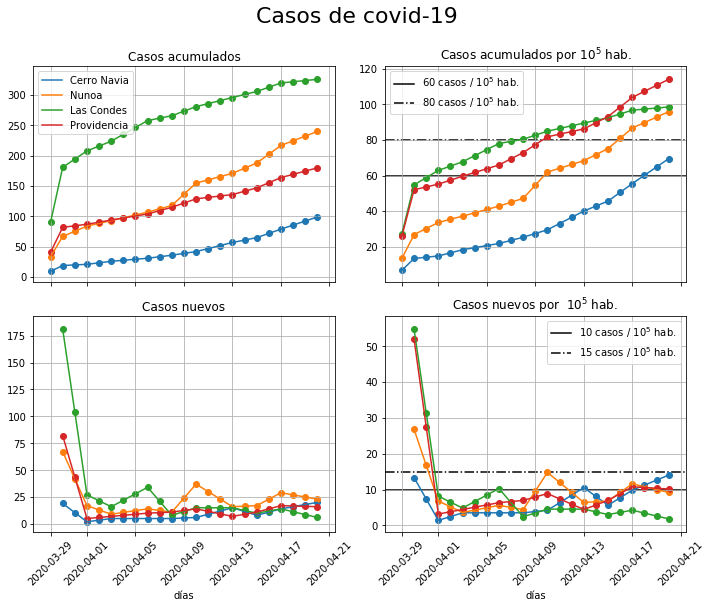

In [30]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Casos de covid-19',  y=1.05, fontsize = 22)

column = 'cum_cases'
title = 'Casos acumulados'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'cum_cases_per_100th'
title = 'Casos acumulados por $10^5$ hab.'
loc_leg = 'best'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
axs[0,1].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[0,1].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cases'
title = 'Casos nuevos'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cases_per_100th'
title = 'Casos nuevos por  $10^5$ hab.'
xlabel = 'días'
loc_leg = 'best'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
axs[1,1].axhline(y=10, c="k", linestyle='-', zorder=0, label='10 casos / $10^5$ hab.')
axs[1,1].axhline(y=15, c="k", linestyle='-.', zorder=0, label='15 casos / $10^5$ hab.')
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
folder_path = r'C:\Users\HN566KT\Downloads'
image_path = os.path.join(folder_path, image_name)
plt.savefig(image_path)

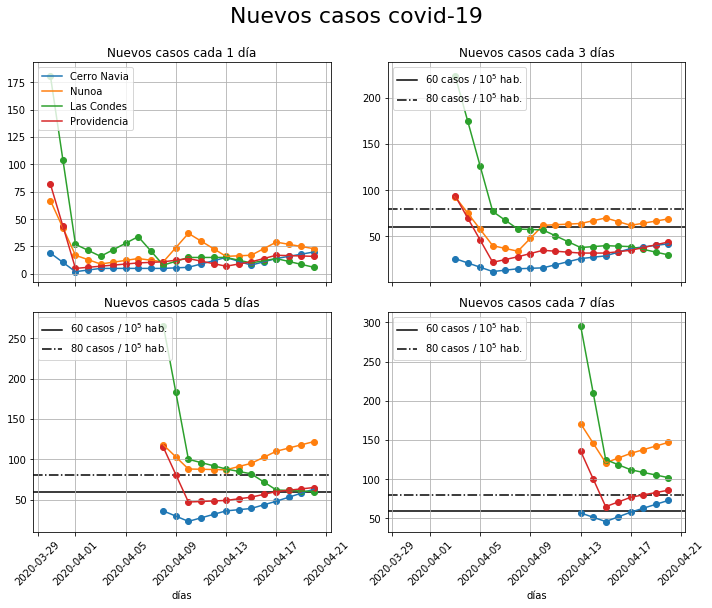

In [31]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Nuevos casos covid-19',  y=1.05, fontsize = 22)

column = 'new_cases'
title = 'Nuevos casos cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'new_cases3'
title = 'Nuevos casos cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
axs[0,1].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[0,1].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cases5'
title = 'Nuevos casos cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
axs[1,0].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,0].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cases7'
title = 'Nuevos casos cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
axs[1,1].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,1].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
#image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
#folder_path = r'C:\Users\HN566KT\Downloads'
#image_path = os.path.join(folder_path, image_name)
#plt.savefig(image_path)

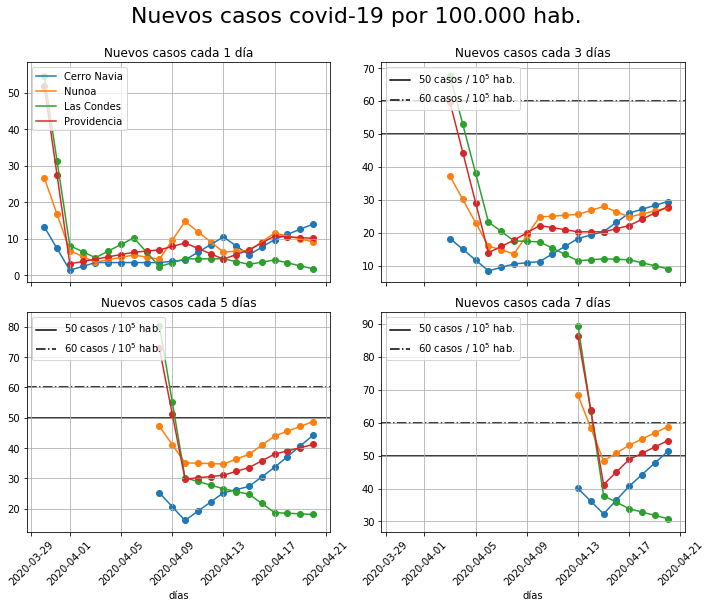

In [32]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Nuevos casos covid-19 por 100.000 hab.',  y=1.05, fontsize = 22)

column = 'new_cases_per_100th'
title = 'Nuevos casos cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'new_cases3_per_100th'
title = 'Nuevos casos cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
axs[0,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
axs[0,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cases5_per_100th'
title = 'Nuevos casos cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
axs[1,0].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
axs[1,0].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cases7_per_100th'
title = 'Nuevos casos cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
axs[1,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
axs[1,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
#image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
#folder_path = r'C:\Users\HN566KT\Downloads'
#image_path = os.path.join(folder_path, image_name)
#plt.savefig(image_path)

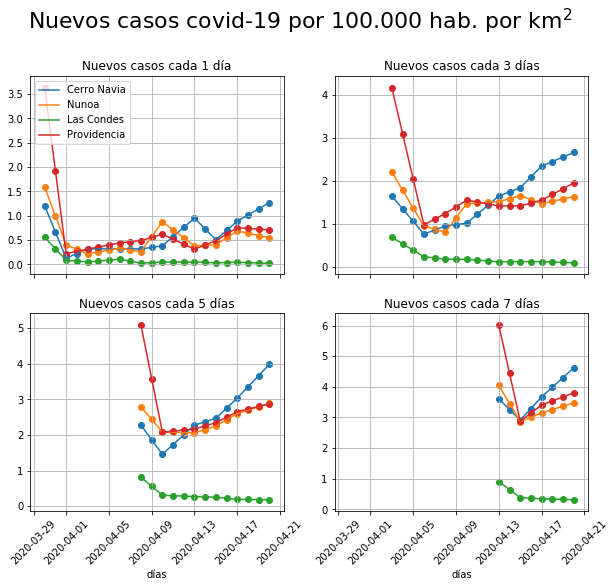

In [33]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Nuevos casos covid-19 por 100.000 hab. por km$^2$',  y=1.0, fontsize = 22)

column = 'new_cas_per_100th_area'
title = 'Nuevos casos cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'new_cas3_per_100th_area'
title = 'Nuevos casos cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
#axs[0,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[0,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
#axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cas5_per_100th_area'
title = 'Nuevos casos cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
#axs[1,0].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[1,0].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
#axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cas7_per_100th_area'
title = 'Nuevos casos cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
#axs[1,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[1,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
#axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

#fig.tight_layout()
image_name = 'Covid19ChileCasos1d5habkm2.jpg'
folder_path = r'C:\Users\HN566KT\Downloads'
image_path = os.path.join(folder_path, image_name)
plt.savefig(image_path)

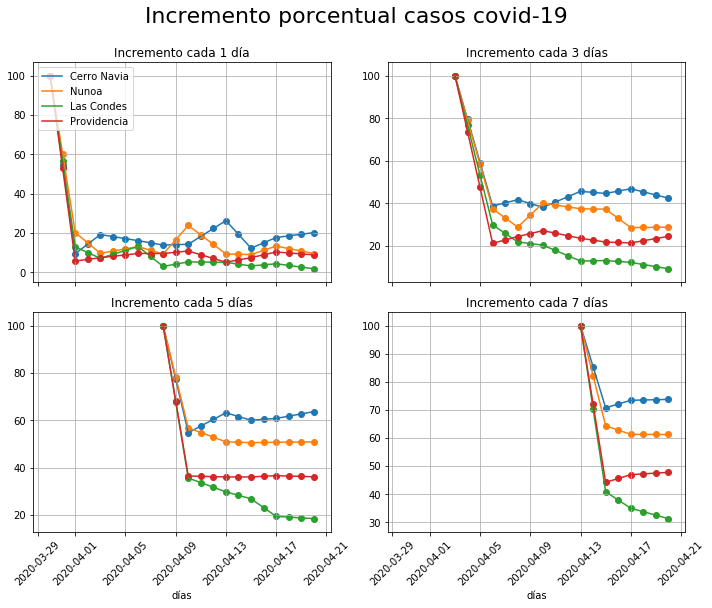

In [34]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Incremento porcentual casos covid-19',  y=1.05, fontsize = 22)

column = 'increment'
title = 'Incremento cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'increment3'
title = 'Incremento cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
#axs[0,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[0,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
#axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'increment5'
title = 'Incremento cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
#axs[1,0].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[1,0].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
#axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'increment7'
title = 'Incremento cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
#axs[1,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[1,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
#axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
#image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
#folder_path = r'C:\Users\HN566KT\Downloads'
#image_path = os.path.join(folder_path, image_name)
#plt.savefig(image_path)